In [68]:
from tensorflow.image import central_crop , random_brightness
import cv2
import matplotlib.pyplot as plt
import os

In [69]:
def path_sequence(root,*directories):
    seq = root
    for directory in directories:
        seq += f"/{directory}"
    return seq

#### Resimleri içeri aktaralım

In [94]:
images_file_path = "./test_images"
image_names_list = os.listdir(images_file_path)
original_images = []
for im_name in image_names_list:
    original_images.append(cv2.imread(path_sequence(images_file_path,im_name))[:,:,::-1])
print(len(original_images))

6


#### Filtreler

In [95]:
from tensorflow.image import adjust_saturation, adjust_contrast,adjust_brightness,adjust_hue,adjust_gamma

In [128]:
def filter_saturation(image,factor=1.25):
    return adjust_saturation(image, factor) , "saturation"

def filter_brightness(image,delta = 0.17):
    return adjust_brightness(image,delta) , "brightness"

def filter_contrast(image,factor=5):
    return adjust_contrast(image,factor) , "contrast"

def filter_hue(image,delta=0.4):
    return adjust_hue(image,delta) , "hue"

def filter_gamma(image,gamma=1,gain=2):
    return adjust_gamma(image,gamma,gain) , "gamma"

In [129]:
def test_filters(image):
    num_rows = 2
    num_columns = 3
    images = [image]
    image_filter_names = ["original"]

    for func in [filter_saturation,filter_brightness,filter_contrast,filter_hue,filter_gamma]:
        filtered_im, filter_name =func(image)
        images.append(filtered_im.numpy())
        image_filter_names.append(filter_name)
    
    main_fig = plt.figure(figsize=(10,5))

    for i in range(num_rows*num_columns):
        main_fig.add_subplot(num_rows,num_columns,i+1)
        plt.imshow(cv2.resize(images[i],(700,500)))
        plt.axis('off')
        plt.title(image_filter_names[i])

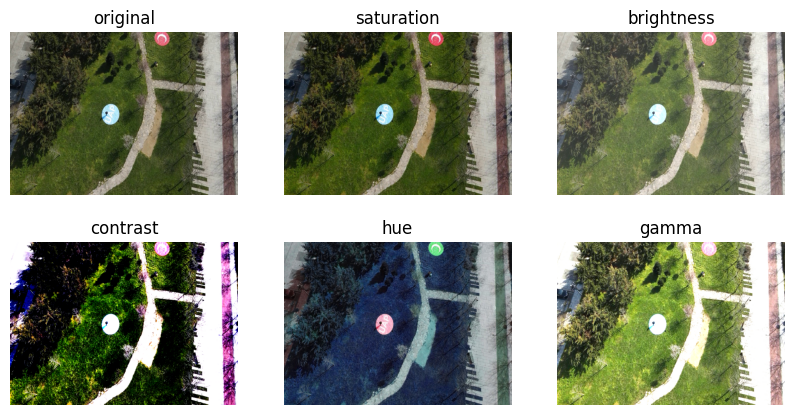

In [130]:
test_filters(original_images[2])

CLAHE ALGORİTMASI

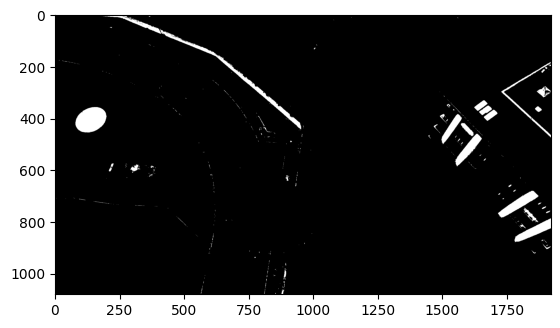

In [65]:
def filter_clahe(image):
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
    clahe = cv2.createCLAHE(clipLimit=5)
    final_img = clahe.apply(image_bw) + 30

    _, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
    plt.imshow(ordinary_img,cmap="gray")
filter_clahe(original_image)